COCONUT AGE CLASSFICATION

## IMPORTS

In [6]:
import sys

!{sys.executable} -m pip install opencv-python
!"{sys.executable}" -m pip install opencv-python
%pip install tensorflow
%pip install pandas
%pip install scikoit-learn
!curl https://rclone.org/install.sh | sudo bash




'c:\Users\Mary' is not recognized as an internal or external command,
operable program or batch file.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikoit-learn (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for scikoit-learn
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   SpenSudo is disabled on this machine. To enable it, go to the ]8;;ms-settings:developers\Developer Settings page]8;;\ in the Settings appt
    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  4734    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (23) Failure writing output to destination, passed 4734 returned 0


In [53]:
import cv2
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import shutil
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support




## PREPROCESSING

In [10]:
# folder path inside Drive
dataset_dir = r"G:\.shortcut-targets-by-id\1K4ECvA6mbQKCzeTBY8_-LN-mojTi3j19\THESIS JOURNEY\Coconut Datasets"




# ----------------------------------
# IMAGE PREPROCESSING
#-----------------------------------

img_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),   # Flipping
    layers.RandomRotation(0.2),                     # Rotation
    layers.RandomZoom(0.2),                         # Zooming
    layers.RandomContrast(0.2),                     # Contrast
    layers.RandomTranslation(0.1, 0.1),             # Shifting
    layers.Resizing(224, 224),                      # Resize to MobileNet input size
    layers.Rescaling(1./255, offset=-1),            # Normalization to [-1,1]
    layers.CenterCrop(224, 224)
])

# Count images in each class folder
class_count = {}

if not os.path.exists(dataset_dir):
    print(f"Error: The folder '{dataset_dir}' does not exist. Please check the path.")
else:
    for class_folder in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_folder)
        if os.path.isdir(class_path):
            class_count[class_folder] = len(os.listdir(class_path))
            if os.path.isdir(class_path):
                count = sum([len(files) for r, d, files in os.walk(class_path)])
                class_count[class_folder] = count

    print("Image counts per class:", class_count)



if class_count:
    max_count = max(class_count.values())
    print(f"Max sample among classes: {max_count}")  
else:
    print("No classes found in the dataset directory.")
    max_count = 0

# Create a balanced dataset by duplicating images in underrepresented classes
for class_name, count in class_count.items():
    class_path = os.path.join(dataset_dir, class_name)
    balanced_class_path = os.path.join(dataset_dir, f"balanced_{class_name}")
    os.makedirs(balanced_class_path, exist_ok=True)       

    # List all images in the class directory
    pic = [
        os.path.join(class_path, img) for img in os.listdir(class_path)
        if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))
    ]
    
    if not pic:
        print(f"No images found in class '{class_name}'. Skipping...")
        continue

    # Copy all the original images first
    for img in pic:
        shutil.copy(img, balanced_class_path)

    # If the class has fewer images than the max count, duplicate images
    # Augment it until it will become balanced
    while len(os.listdir(balanced_class_path)) < max_count:
        img_to_aug = random.choice(pic)
        # You can add augmentation code here if needed
        shutil.copy(img_to_aug, balanced_class_path)
            
        # Load image
        pil_img = Image.open(img_to_aug).convert("RGB").resize((224, 224))
        arr = np.array(pil_img) / 255.0
        arr = np.expand_dims(arr, axis=0)
        
        # Applying Augmentation
        aug_img = img_augmentation(arr, training=True).numpy()[0]
        aug_img = (aug_img * 255).astype(np.uint8)
        
        # Save augmented image
        aug_img_name = f"aug_{len(os.listdir(balanced_class_path))}_{os.path.basename(img_to_aug)}"
        Image.fromarray(aug_img).save(os.path.join(balanced_class_path, aug_img_name))
    
# Combine all balanced class directories into a single balanced dataset directory
balanced_dataset_dir = os.path.join(os.path.dirname(dataset_dir), "balanced_dataset")
os.makedirs(balanced_dataset_dir, exist_ok=True)
for class_name in class_count.keys():
    src = os.path.join(dataset_dir, f"balanced_{class_name}")
    dst = os.path.join(balanced_dataset_dir, class_name)
    shutil.move(src, dst)

print("Balanced dataset created at:", balanced_dataset_dir)
        


Image counts per class: {'Training': 296, 'Testing': 68, 'Validation': 70, 'balanced_Training': 1, 'balanced_Testing': 1, 'balanced_Validation': 1, 'balanced_balanced_Training': 1}
Max sample among classes: 296
No images found in class 'Training'. Skipping...
No images found in class 'Testing'. Skipping...
No images found in class 'Validation'. Skipping...
No images found in class 'balanced_Training'. Skipping...
No images found in class 'balanced_Testing'. Skipping...
No images found in class 'balanced_Validation'. Skipping...
No images found in class 'balanced_balanced_Training'. Skipping...
Balanced dataset created at: G:\.shortcut-targets-by-id\1K4ECvA6mbQKCzeTBY8_-LN-mojTi3j19\THESIS JOURNEY\balanced_dataset


In [ ]:


# Load the numerical dataset
df = pd.read_csv('Numerical_Datasets.csv', header=1) 


# ----------------------------------
# NUMERICAL PREPROCESSING
#-----------------------------------

# Step 1: Ensure numeric data
for c in ["HeightTrunk", "11leafscars", "Year"]:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Step 2: Applying the PCA Formula: Age = TrunkHeight / L11 + 5
df["age_formula"] = df["HeightTrunk"] / df["11leafscars"] + 5

# Step 3: Min-Max Scaling
if "Year" in df.columns and df["Year"].notna().any():
    df["actual_age"] = 2025 - df["Year"]

    # Step 4: Calibrate the formula using linear regression
    mask = df["actual_age"].notna() & np.isfinite(df["actual_age"])
    x = df.loc[mask, ["age_formula"]]
    y = df.loc[mask, ["actual_age"]]

    # Step 5: Fit linear regression model
    reg = LinearRegression().fit(x, y)
    a = float(reg.coef_[0])
    b = float(reg.intercept_)
else:
    # Fallback if no year column
    a, b = 1.0, 0.0    

# Step 6: Apply calibrated formula
df["final_age"] = a * df["age_formula"] + b

# Steo 7: Clip negative aged or unrealistic ages
df["final_age"] = df["final_age"].clip(lower=0)




# Step 5: Show the results
#print("Calibrated a, b:", a, b)
print(df[["age_formula","actual_age","final_age"]].head(200))
#print(df[['HeightTrunk','11leafscars']].head(10))
#print(df[['HeightTrunk','11leafscars']].describe())
#print(df[['age_formula']].head(10))
#print(df[['final_age']].head(10))


     age_formula  actual_age  final_age
0      20.233333          18  44.217924
1      20.233333          18  44.217924
2      20.233333          18  44.217924
3      19.061538          18  41.045622
4      19.061538          18  41.045622
..           ...         ...        ...
195    25.594595          49  58.732018
196    25.594595          49  58.732018
197    22.720930          49  50.952387
198    22.720930          49  50.952387
199    22.720930          49  50.952387

[200 rows x 3 columns]


C:\Users\Mary Vee\AppData\Local\Temp\ipykernel_13884\88821929.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a = float(reg.coef_[0])
C:\Users\Mary Vee\AppData\Local\Temp\ipykernel_13884\88821929.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b = float(reg.intercept_)


## TRAINING THE MODEL


### CNN-MOBILE NET




Load Dataset


In [57]:
base_dir = r"G:\.shortcut-targets-by-id\1K4ECvA6mbQKCzeTBY8_-LN-mojTi3j19\THESIS JOURNEY\Coconut Datasets"

train_path = os.path.join(base_dir, "Training")
val_path   = os.path.join(base_dir, "Validation")
test_path  = os.path.join(base_dir, "Testing")

Read The Directory

In [26]:
train_dir = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(224, 224),
    validation_split=0.2,
    subset="training",
    seed=123,
    batch_size=32        
)

val_dir = tf.keras.utils.image_dataset_from_directory(
    val_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

# Normalize pixel values to [-1, 1] (Requirement for MobileNetV2)
train_ds = train_dir.map(lambda x, y: (preprocess_input(x), y)).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_dir.map(lambda x, y: (preprocess_input(x), y)).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 289 files belonging to 3 classes.
Using 232 files for training.
Found 63 files belonging to 3 classes.
Using 12 files for validation.


Load MobileNetv2 as Based Model

In [27]:
based_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
)

based_model

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


<Functional name=mobilenetv2_1.00_224, built=True>

Build the Model

In [28]:
global_avg = layers.GlobalAveragePooling2D()(based_model.output)
dropout = layers.Dropout(0.2)(global_avg) # Dropout layer to reduce overfitting
output = layers.Dense(len(class_count), activation='softmax')(dropout) # Final output layer for classification

model = tf.keras.Model(inputs=based_model.input, outputs=output)

# Freeze the base model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,266,951 (8.65 MB)

 Trainable params: 2,232,839 (8.52 MB)

 Non-trainable params: 34,112 (133.25 KB)

Train the Model 

In [29]:
Epochs = 20

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=Epochs
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 88s 5s/step - accuracy: 0.3879 - loss: 1.6853 - val_accuracy: 0.0833 - val_loss: 2.8858
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.9871 - loss: 0.2793 - val_accuracy: 0.0833 - val_loss: 3.4849
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 1.0000 - loss: 0.0766 - val_accuracy: 0.0833 - val_loss: 3.9706
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 1.0000 - loss: 0.0268 - val_accuracy: 0.0833 - val_loss: 4.1224
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 0.0833 - val_loss: 4.1700
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 0.0833 - val_loss: 4.1525
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 0.0833 - val_loss: 4.1238
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.0833 - val_loss: 4.0739
Epoch 9/

Fine-tuning the model by unfreezing some layers of the base model

In [30]:
based_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 100
for layer in based_model.layers[:fine_tune_at]:
    layer.trainable = False
    
# Compile the model again after making changes to the trainable status
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=13e-5), # Lower learning rate for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training the model
fine_tune_epochs = 10
total_epochs = Epochs + fine_tune_epochs

# Train the model again
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1]
)

# Save the trained model
model.save('age_classification_model.h5')   

Epoch 20/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.9784 - loss: 0.0695 - val_accuracy: 0.4167 - val_loss: 2.3079
Epoch 21/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.5000 - val_loss: 1.4681
Epoch 22/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.5833 - val_loss: 1.3383
Epoch 23/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.5833 - val_loss: 1.3260
Epoch 24/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.5833 - val_loss: 1.3344
Epoch 25/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 1.0000 - loss: 6.6089e-04 - val_accuracy: 0.5833 - val_loss: 1.3441
Epoch 26/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 1.0000 - loss: 5.7469e-04 - val_accuracy: 0.5833 - val_loss: 1.3454
Epoch 27/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 1.0000 - loss: 4.9624e-04 - val_accuracy: 0.5833 - val_l

EVALUATION

1/1 - 0s - 394ms/step - accuracy: 0.5833 - loss: 1.3027
Test Loss: 1.3027 
Test Accuracy: 0.5833
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
Classification Report:
              precision    recall  f1-score   support

     [21-40]       0.17      1.00      0.29         1
     [41-60]       1.00      0.60      0.75        10
      [5-20]       0.00      0.00      0.00         1

    accuracy                           0.58        12
   macro avg       0.39      0.53      0.35        12
weighted avg       0.85      0.58      0.65        12



c:\Users\Mary Vee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mary Vee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mary Vee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

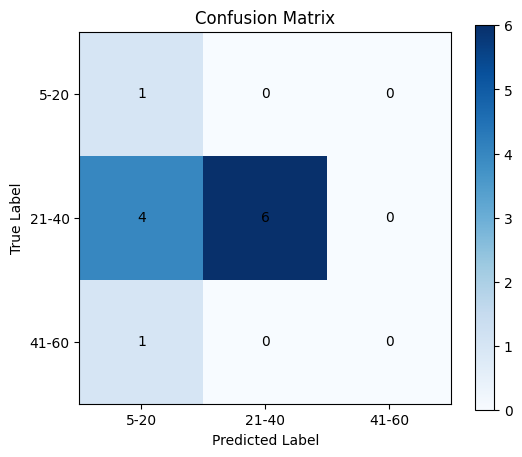

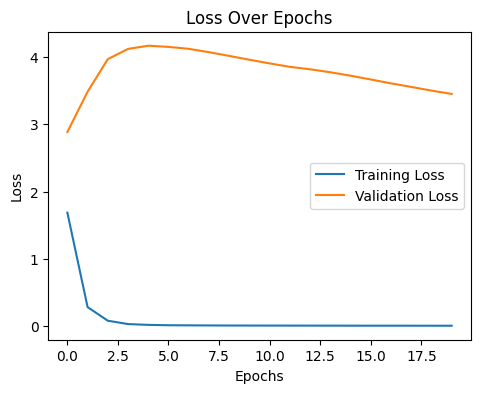

c:\Users\Mary Vee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


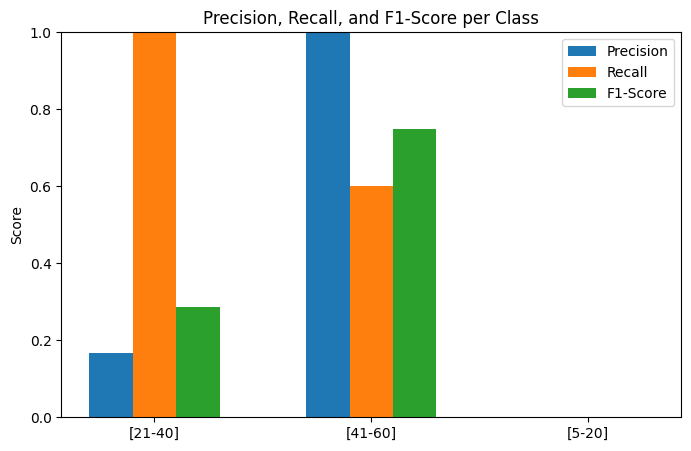

In [56]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
print(f"Test Loss: {test_loss:.4f} ")
print(f"Test Accuracy: {test_acc:.4f}")


#--------------------------
# Prediction for metrics
#--------------------------

y_true = []
y_pred = []

class_names = train_dir.class_names

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))
    
y_true = np.array(y_true)
y_pred = np.array(y_pred)

#------------------------------------------------------
# Classification Report (Precision, Recall, F1-Score)
#------------------------------------------------------

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

#--------------------------------
# Confusion Matrix
#--------------------------------
cm = confusion_matrix(y_true, y_pred)
class_name = ["5-20","21-40","41-60"]

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(ticks=range(len(class_name)), labels=class_name)
plt.yticks(ticks=range(len(class_name)), labels=class_name)

# Annotate numbers
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
        
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#--------------------------------
# Training Accuracy and Loss
#--------------------------------
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#-------------------------------------
# Precision, Recall, and F1 per class
#-------------------------------------
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred)

x = range(len(class_names))
plt.figure(figsize=(8, 5))
plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar([p + 0.2 for p in x], recall, width=0.2, label='Recall', align='center')
plt.bar([p + 0.4 for p in x], f1, width=0.2, label='F1-Score', align='center')
plt.xticks([p + 0.2 for p in x], class_names)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score per Class')
plt.legend()
plt.show()


### SVM CLASSIFICATION 
